In [1]:
import numpy as np
#now we're going to import matplotlib.pyplot
import matplotlib.pyplot as plt

# Challenge

To test your understanding of arrays and plotting, try computing and visualizing the value of $\pi$.

One of the most straightforward ways to compute $\pi$ is by calculating the ratio of the area of a square and it's inscribed circle. If the square is side length 2, then it's area is 4. It's inscribed circle has radius 1 and has area $\pi$. If we place a bunch of points inside the square randomly and then check how many fall inside the circle, we can estimate the fraction of the square's area that is covered by the circle. Specifically, we can write the fraction of points that fall inside the circle as

$$ f = \frac{\text{Area of Circle}}{\text{Area of Square}} = \frac{\pi r^2}{(2r)^2}$$

Plugging in our known areas and solving for pi gives: 

$$ \pi = 4f $$



Your task is to compute $\pi$ using Numpy and plot your resulting random points using Pyplot. The code to create random numbers and plot a square and circle is provided for you.

In [2]:
# This creates a random number generator
seed = 1234
rng = np.random.default_rng(seed)

# You can generate random numbers using the random() function
# If you give no arguments, the number will fall in [0,1) uniformly
random_number = rng.random()
#print(random_number)

# You can create an array of random numbers using random() as well
random_array = rng.random((10,10))
#print(random_array)


# If you want a different range than [0,1), you can either multiply and add like 

random_number = 10 * rng.random() + 10
#print(random_number)

# or you can use the uniform() function

random_number = rng.uniform(10, 20)
#print(random_number)

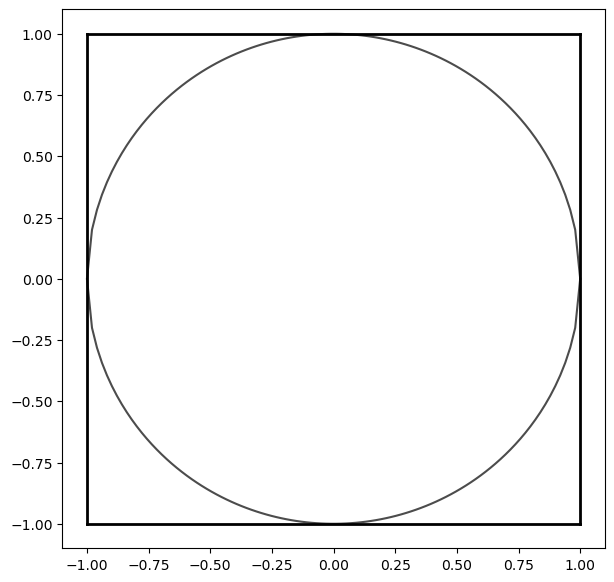

In [3]:
plt.figure(figsize=(7,7))

#define circle x and y
circx = np.linspace(-1,1,100)
circy = np.sqrt(1 - circx**2)

#plot the circle 
plt.plot(circx, circy, c='k', alpha=0.7)
plt.plot(circx, -circy, c='k', alpha=0.7)

#plot the 4 sides of a square
plt.plot([-1, 1], [-1, -1], c='k', lw = 2) #bottom
plt.plot([-1, 1], [1, 1], c='k', lw = 2) #top
plt.plot([-1, -1], [-1, 1], c='k', lw = 2) #left
plt.plot([1, 1], [-1, 1], c='k', lw = 2) #right

plt.show()

# Example Solution

In [7]:
#generate the random points
N = 100000
random_x = rng.uniform(-1, 1, N)
random_y = rng.uniform(-1, 1, N)

#compute the distance from the origin
distance = np.sqrt(random_x**2 + random_y**2)

#check if the distance is less than 1
#Note this returns a boolean array of True and False
inside = distance <= 1

#count how many points are inside the circle
#Note that True is 1 and False is 0
frac_inside = np.sum(inside) / N

#multiply by 4 to get an approximation of pi
pi = frac_inside * 4

print(f'Approximation of pi: {pi}')

Approximation of pi: 3.14688


In [8]:
#computing the percent error
percent_error = 100 * (pi - np.pi) / np.pi
print(f'Percent error: {percent_error:.2f}%')

Percent error: 0.17%


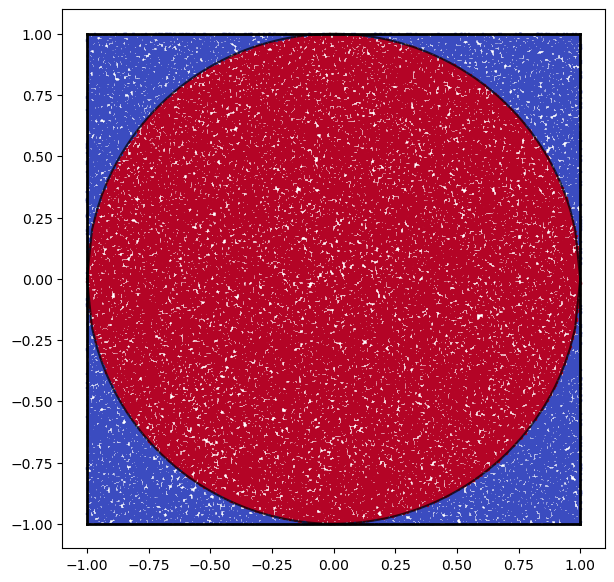

In [13]:
plt.figure(figsize=(7,7))

#define circle x and y
circx = np.linspace(-1,1,100)
circy = np.sqrt(1 - circx**2)

#New line of code
plt.scatter(random_x, random_y, c = inside, cmap = 'coolwarm', s = 1, marker = ',', )

#plot the circle 
plt.plot(circx, circy, c='k', alpha=0.7)
plt.plot(circx, -circy, c='k', alpha=0.7)

#plot the 4 sides of a square
plt.plot([-1, 1], [-1, -1], c='k', lw = 2) #bottom
plt.plot([-1, 1], [1, 1], c='k', lw = 2) #top
plt.plot([-1, -1], [-1, 1], c='k', lw = 2) #left
plt.plot([1, 1], [-1, 1], c='k', lw = 2) #right
#plt.colorbar()

plt.show()

In [14]:
def estimation_of_pi(N):

    ''' 
    Function to compute the approximation of pi using the Monte Carlo method.

    Inputs:
    N (int): Number of random points to generate

    Outputs:
    pi (float): Approximation of pi

    '''

    random_x = rng.uniform(-1, 1, N)
    random_y = rng.uniform(-1, 1, N)

    distance = np.sqrt(random_x**2 + random_y**2)
    inside = distance <= 1
    frac_inside = np.sum(inside) / N
    pi = frac_inside * 4
    
    return pi

In [19]:
#Generating a list of N values
N_list = [100, 1000, 10000, 100000, 1000000, 10000000]

#Computing the percent error of pi for each N value
error_list = []
pi_list = []
for i in N_list:
    pi = estimation_of_pi(i)
    pi_list.append(pi)
    percent_error = 100 * np.abs(pi - np.pi) / np.pi
    error_list.append(percent_error)

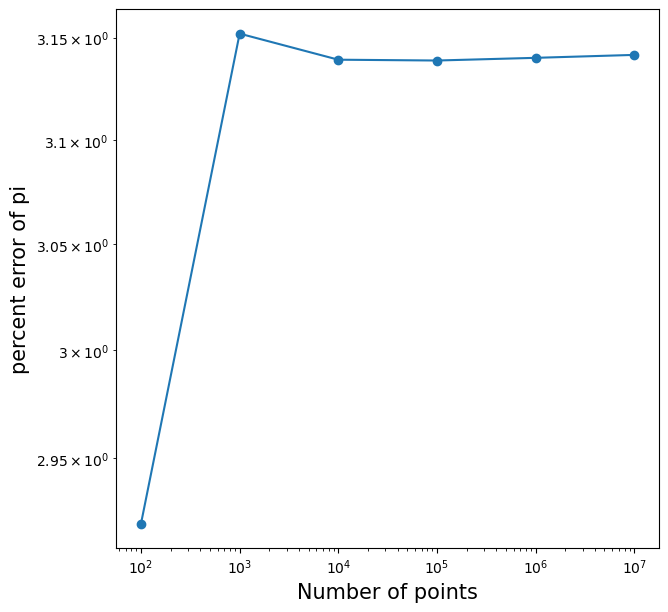

In [20]:
plt.figure(figsize=(7,7))
plt.plot(N_list, pi_list, 'o-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of points', fontsize = 15)
plt.ylabel('percent error of pi', fontsize = 15)
plt.show()

# Object Oriented Plotting

Object-oriented plotting using ax objects in Matplotlib is a powerful way to create and customize plots. This approach provides more control over the plot elements and is useful for creating complex visualizations.

Step-by-Step Plan:

1. Import Matplotlib and Create a Figure and Axes Object: Use plt.subplots() to create a figure and one or more axes objects.
2. Plot Data Using Axes Methods: Use methods of the ax object to plot data.
3. Customize the Plot: Customize the plot by setting titles, labels, and other properties using the ax object methods.
4. Show the Plot: Use plt.show() to display the plot.


Usefulness of Object-Oriented Plotting:

- Fine-Grained Control: Allows precise control over each plot element (e.g., titles, labels, legends).
- Multiple Plots: Easily create and manage multiple subplots within a single figure.
- Reusability: Methods and properties of ax objects can be reused and modified independently.
- Complex Layouts: Facilitates the creation of complex layouts and customizations.
- This approach is particularly useful for creating professional and publication-quality plots.

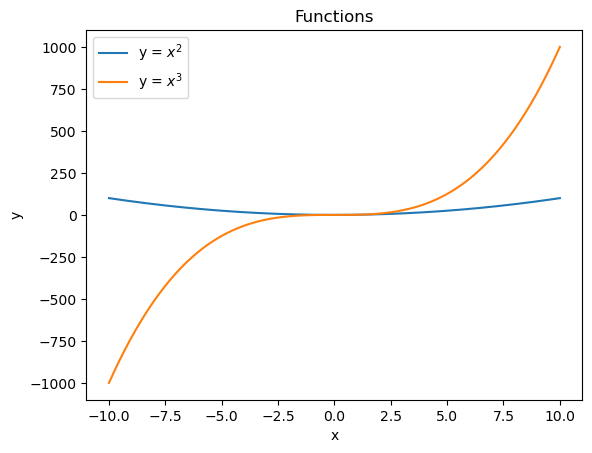

In [29]:
x = np.linspace(-10, 10, 1000)
y = x**2
y2 = x**3

fig, ax = plt.subplots()
#fig1, ax1 = plt.subplots()
ax.plot(x, y, label = r'y = $x^2$')
ax.plot(x, y2, label = r'y = $x^3$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Functions')
ax.legend()
#fig.savefig()
#plt.show()
plt.show()

# Matplotlib Subplots

`matplotlib` is a powerful plotting library for Python. One of its useful features is the ability to create subplots, which allows you to display multiple plots in a single figure.

## Creating Subplots

You can create subplots using the `plt.subplots()` function. This function returns a figure object and an array of axes objects. The basic syntax is seen below:

In [30]:
x = np.linspace(-10, 10, 1000)

y = x**2
y2 = x**3
y3 = np.sin(x)
y4 = np.cos(x)
y5 = np.exp(x)
y6 = np.log(x)

/var/folders/t2/6968g8md2c9g1mm1h0p9nxl588s4s1/T/ipykernel_72815/709993050.py:8: RuntimeWarning: invalid value encountered in log
  y6 = np.log(x)


AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

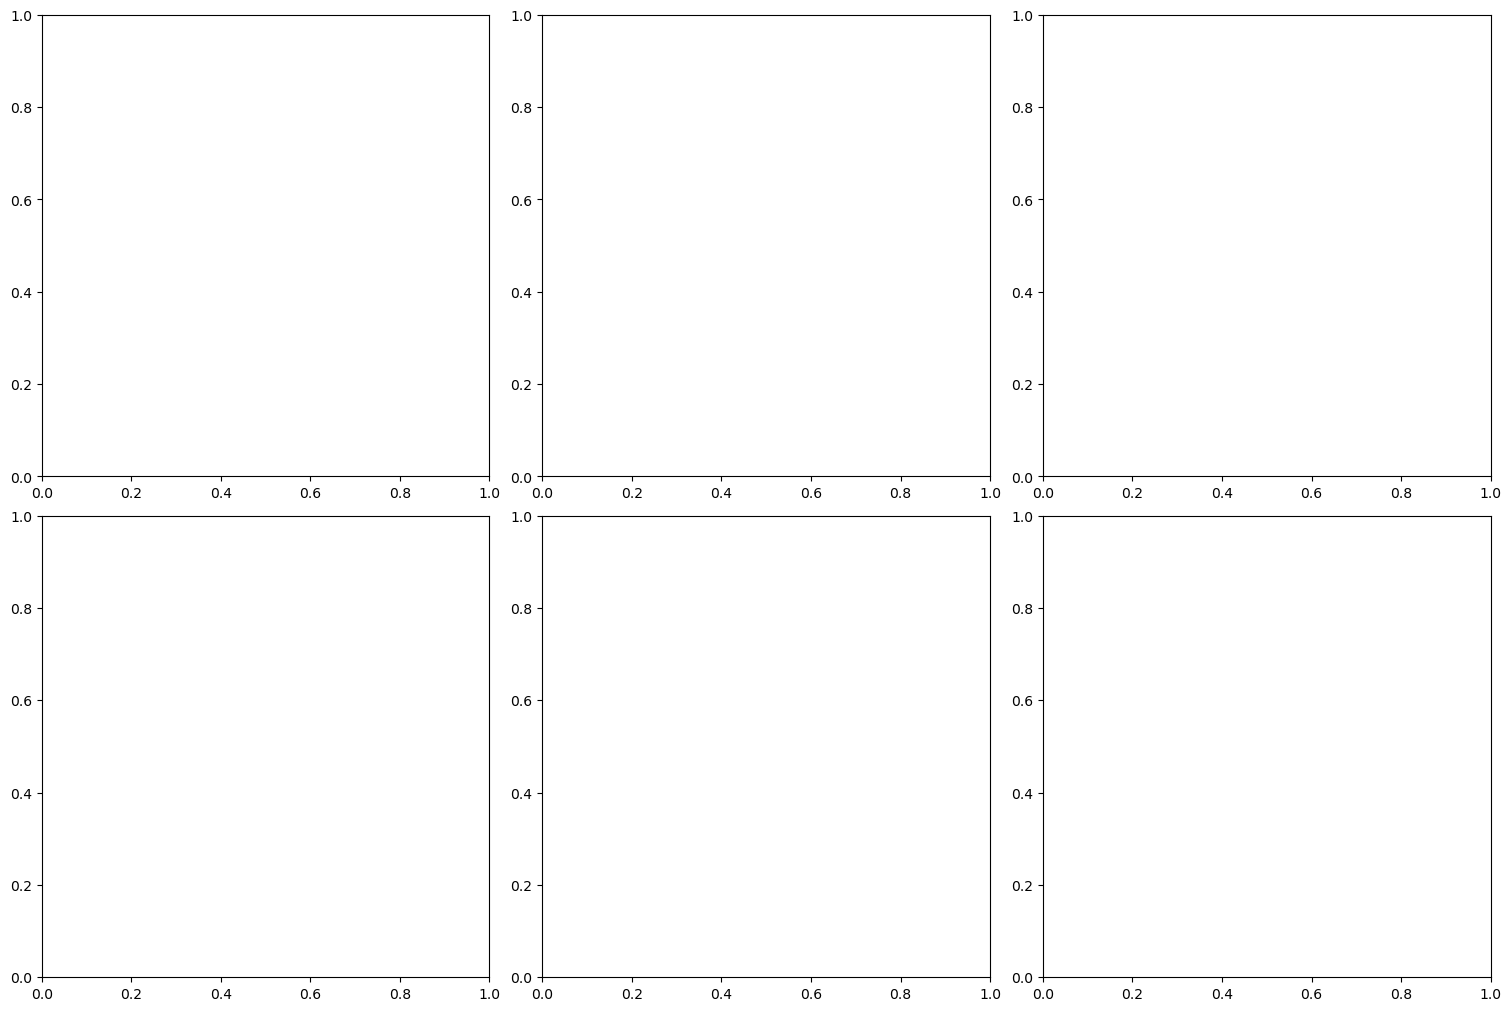

In [44]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10), constrained_layout = True)
axes.set_title('Title')

In [37]:
ax1 = axes[0, 0]
ax2 = axes[0, 1]

<Axes: title={'center': '$y = x^2$'}>

In [38]:
def func():

    return 4, 5

In [42]:
a = func()

(4, 5)

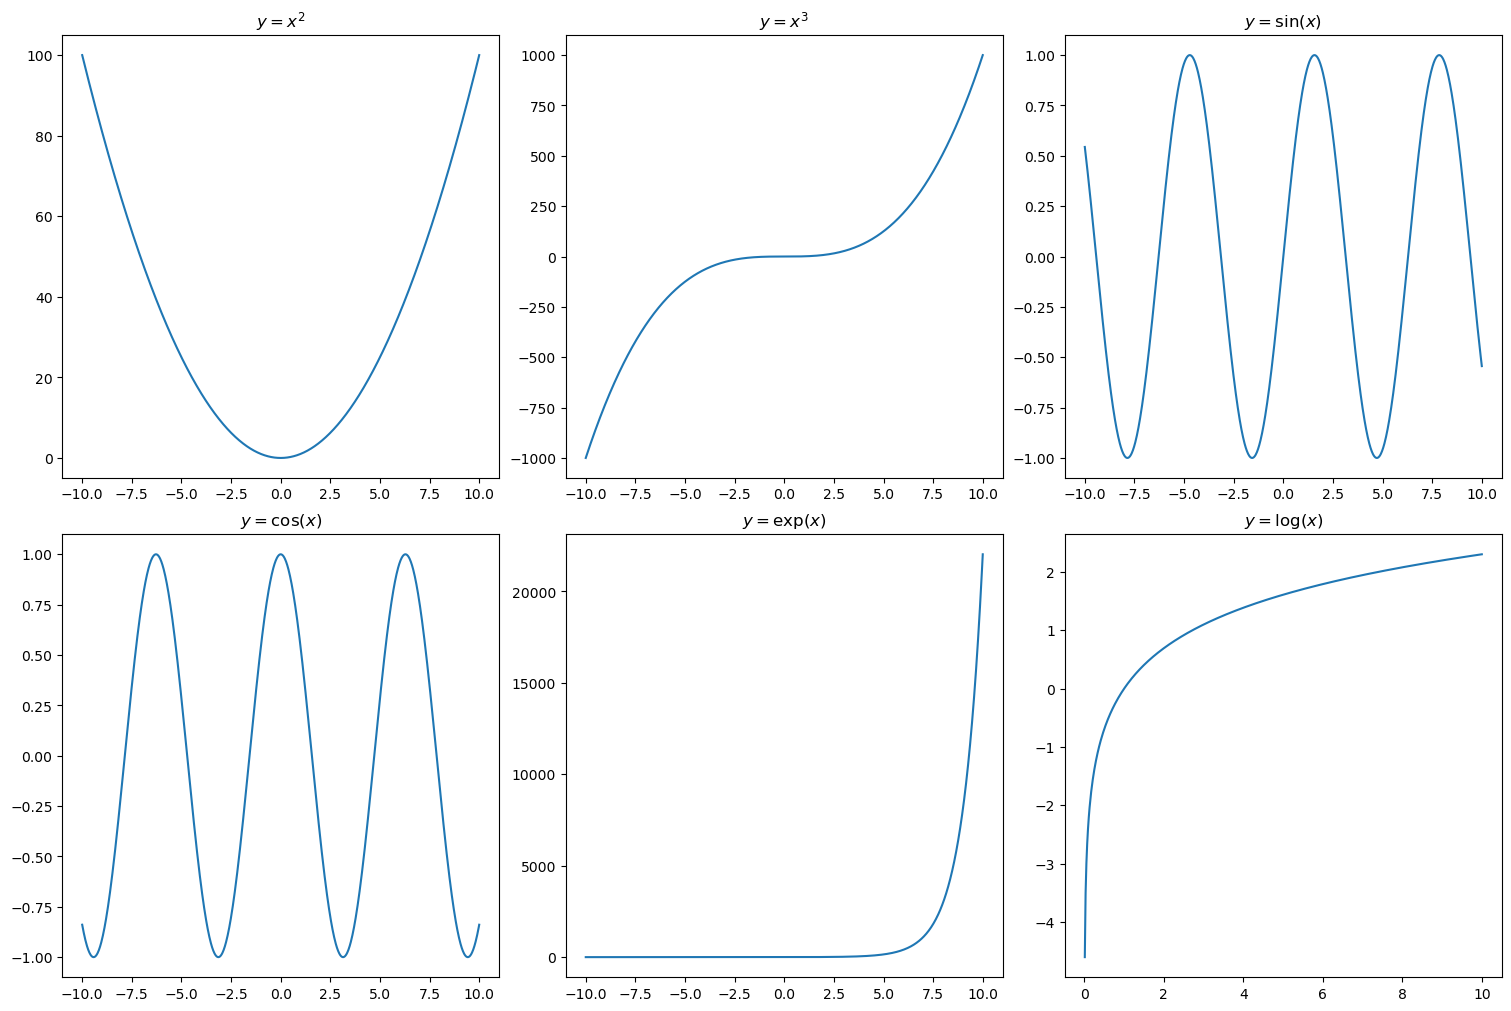

In [35]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10), constrained_layout = True)

axes[0, 0].plot(x, y)
axes[0, 0].set_title(r'$y = x^2$')

axes[0, 1].plot(x, y2)
axes[0, 1].set_title(r'$y = x^3$')

axes[0, 2].plot(x, y3)
axes[0, 2].set_title(r'$y = \sin(x)$')

axes[1, 0].plot(x, y4)
axes[1, 0].set_title(r'$y = \cos(x)$')

axes[1, 1].plot(x, y5)
axes[1, 1].set_title(r'$y = \exp(x)$')

axes[1, 2].plot(x, y6)
axes[1, 2].set_title(r'$y = \log(x)$')

plt.show()


# Exercise 

Your objective is to make some subplots that has 2 rows and 2 columns and we ask the following to be displayed in each plot:

1. Upper Left:  Plot up the equation: y = 2*x+9 and y = -2x and make sure to label each line accordingly
2. Upper Right: Plot up sin(x) and -sin(x), make sure label each line accordingly
3. Lower Left:  Plot up $\sqrt{3x^2 - 2x + 7}$
4. Lower Right  Plot up the equation of a gaussian with $\mu$ = 3 and $\sigma$ = 5

Recall equation of a gaussian is:

Gaussian = $\frac{1}{\sigma \sqrt(2 \pi)} e^{- \frac{(x - \mu)^2}{2 \sigma^2}}$

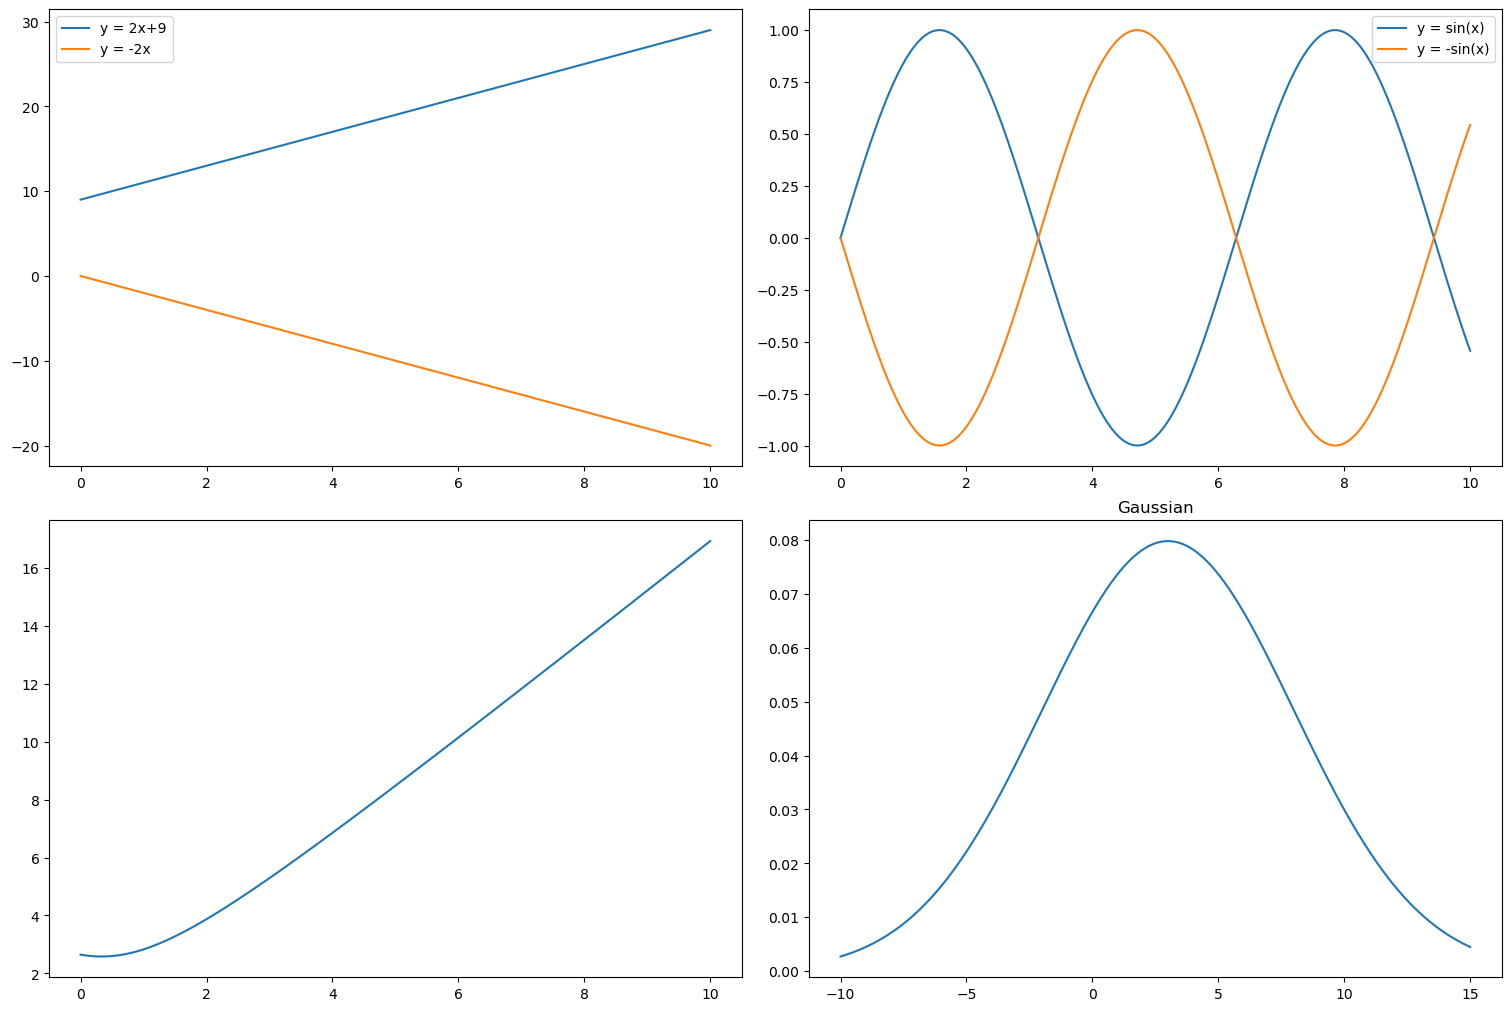

In [50]:
#Your code here
x = np.linspace(0, 10, 1000)
y1 = 2*x+9
y2 = -2*x

y3 = np.sin(x)
y4 = -np.sin(x)

y5 = np.sqrt(3*x**2 -2*x+7)

x1 = np.linspace(-10, 15, 1000)
y6 = 1/(5*np.sqrt(2*np.pi)) * np.exp(-(x1 - 3)**2 / (2*5**2))

fig, axes = plt.subplots(2, 2, figsize = (15, 10), constrained_layout = True)

axes[0, 0].plot(x, y1, label = 'y = 2x+9')
axes[0, 0].plot(x, y2, label = 'y = -2x')
axes[0, 0].legend()


axes[0, 1].plot(x, y3, label = 'y = sin(x)')
axes[0, 1].plot(x, y4, label = 'y = -sin(x)')
axes[0, 1].legend()

axes[1, 0].plot(x, y5)

axes[1, 1].plot(x1, y6)
axes[1, 1].set_title('Gaussian')

plt.show()



# Histograms

Histograms are really good at taking your data and seeing how much of your data falls in discrete bins. This is usefull if you ran a model and are checking the posterior distributions or if want to see where your sample falls in redshift space. Histograms are a really useful way to learn more about your data. 

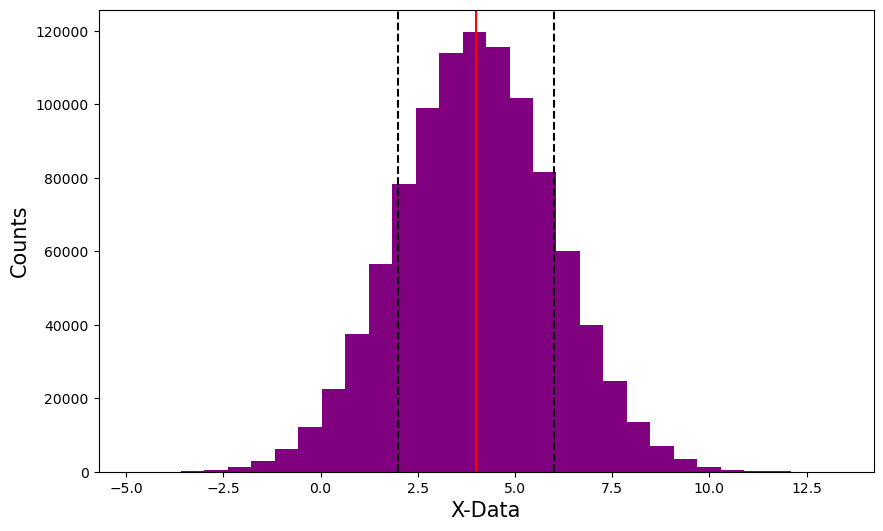

In [58]:
gauss = np.random.normal(loc = 4, scale = 2, size = 1000000)

plt.figure(figsize = (10, 6))
plt.hist(gauss, color = 'purple', bins = 30)
plt.axvline(4, linestyle = '-', color = 'red')
plt.axvline(2, linestyle = '--', color = 'black')
plt.axvline(6, linestyle = '--', color = 'black')
plt.xlabel('X-Data', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)

plt.show()

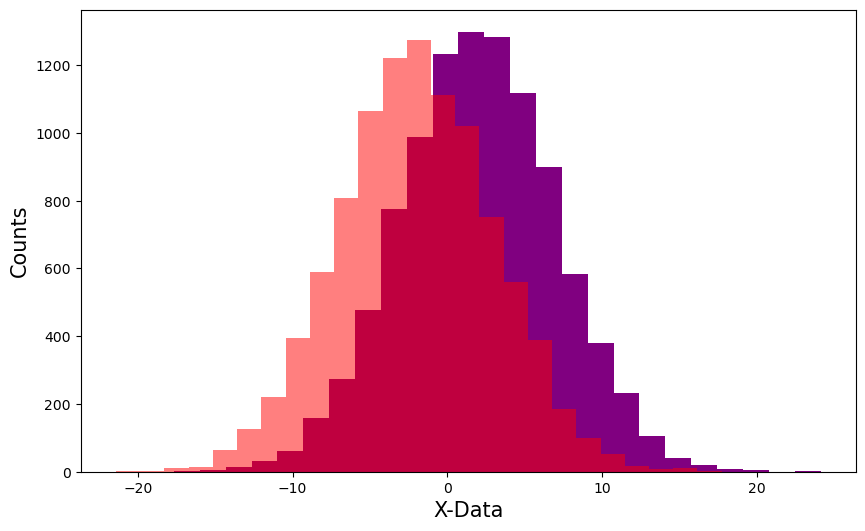

In [59]:
gauss1 = np.random.normal(loc = 2, scale = 5, size = 10000)
gauss2 = np.random.normal(loc = -2, scale = 5, size = 10000)

plt.figure(figsize = (10, 6))
plt.hist(gauss1, color = 'purple', bins = 25, histtype='stepfilled')
plt.hist(gauss2, color = 'red', bins = 25, histtype='stepfilled', alpha = 0.5)
plt.xlabel('X-Data', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)

plt.show()

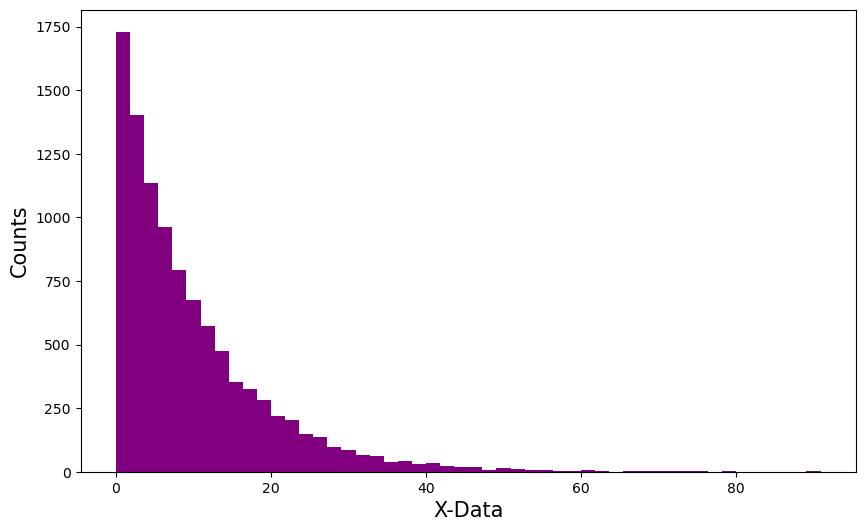

In [61]:
exp = np.random.exponential(scale = 10, size = 10000)

plt.figure(figsize = (10, 6))
plt.hist(exp, color = 'purple', bins = 50)
plt.xlabel('X-Data', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)

plt.show()

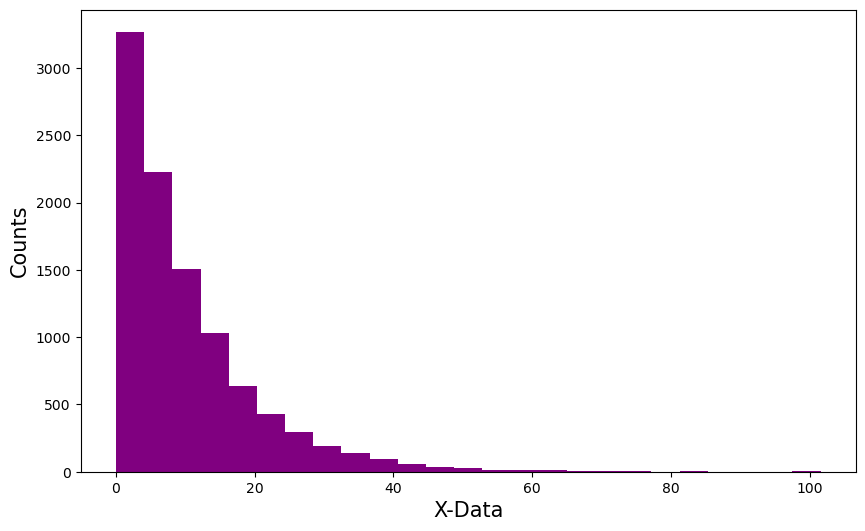

In [62]:
exp = np.random.exponential(scale = 10, size = 10000)

fig, ax = plt.subplots(figsize = (10, 6))
ax.hist(exp, color = 'purple', bins = 25)
ax.set_xlabel('X-Data', fontsize = 15)
ax.set_ylabel('Counts', fontsize = 15)

plt.show()

# Exercise: 

Pick a probability distribution that you either worked with before or have heard about in class and try to plot a histogram of the probability distribution. Try this for a variety of bins what do you notice when the number of bins increases?

Example Distributions in numpy:

- uniform
- normal
- binomial
- poisson
- exponential
- gamma
- beta
- chisquare
- standard_t
- logistic


In [ ]:
# Code here



# 2D Plotting using plt.imshow

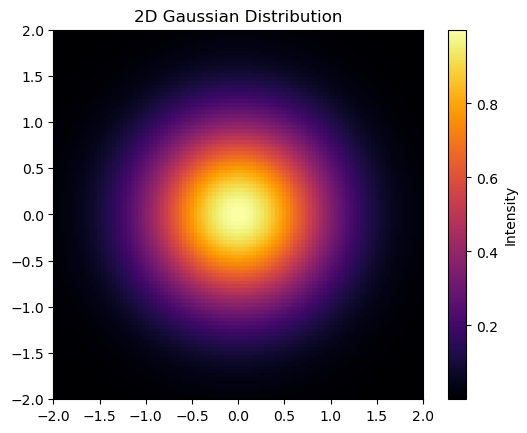

In [66]:
# Generate a 2D Gaussian distribution
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(X**2 + Y**2))

# Plot using imshow
plt.imshow(Z, extent=[-2, 2, -2, 2], origin='lower', cmap='inferno')
plt.colorbar(label="Intensity")
plt.title("2D Gaussian Distribution")
plt.show()


In [67]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

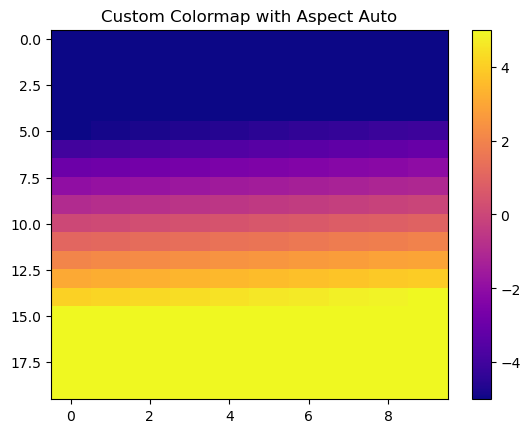

In [70]:
# Generate a gradient matrix
data = np.linspace(-10, 10, 200).reshape(20, 10)

# Plot with custom colormap and aspect ratio
plt.imshow(data, cmap='plasma', aspect='auto', vmin=-5, vmax=5)
plt.colorbar()
plt.title("Custom Colormap with Aspect Auto")
plt.show()


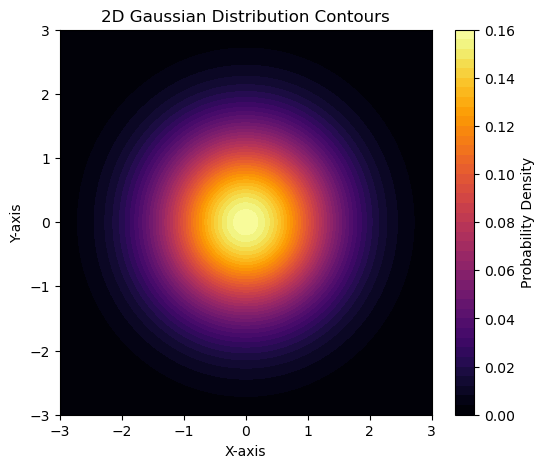

In [74]:
# Define grid
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Define 2D Gaussian function
mu_x, mu_y = 0, 0  # Mean
sigma_x, sigma_y = 1, 1  # Standard deviations
Z = (1 / (2 * np.pi * sigma_x * sigma_y)) * np.exp(
    -((X - mu_x) ** 2 / (2 * sigma_x ** 2) + (Y - mu_y) ** 2 / (2 * sigma_y ** 2))
)

# Plot filled contour
plt.figure(figsize=(6, 5))
contour = plt.contourf(X, Y, Z, levels=50, cmap='inferno')
plt.colorbar(label="Probability Density")
plt.title("2D Gaussian Distribution Contours")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


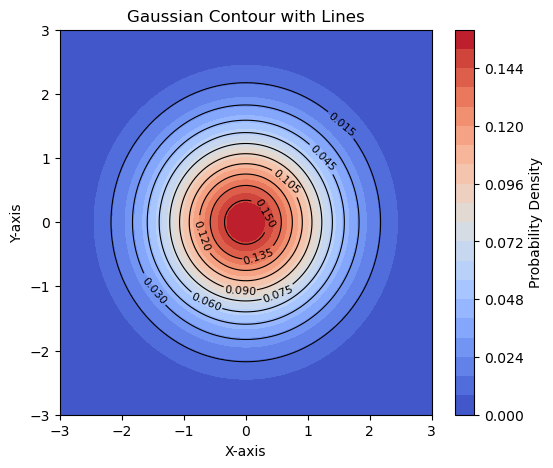

In [75]:
plt.figure(figsize=(6, 5))
contour_filled = plt.contourf(X, Y, Z, levels=20, cmap='coolwarm')
contour_lines = plt.contour(X, Y, Z, levels=10, colors='black', linewidths=0.8)
plt.clabel(contour_lines, inline=True, fontsize=8)  # Add labels to contours
plt.colorbar(contour_filled, label="Probability Density")
plt.title("Gaussian Contour with Lines")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()
